# Homework 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from urllib.parse import unquote
import itertools

In [2]:
search_df = pd.read_json('search_sample.txt', lines=True)

In [3]:
query_re = re.compile('query=[^&]*')
def get_row_query(row):
    if row['url']:
        match = query_re.search(row['url'])
        if match != None and match[0]:
            return unquote(match[0][6:]).split(' ')
        return "N/A"

In [4]:
search_df['query'] = search_df.apply(lambda row: get_row_query(row), axis=1)
search_df['word_count'] = search_df.apply(lambda row: len(row['query']), axis=1)

In [5]:
df_zero_results = search_df[search_df['totalresults'] == 0]

In [6]:
def create_word_count_map(row, word_counts):
        if row['word_count'] in word_counts:
            word_counts[row['word_count']] += 1
        else:
            word_counts[row['word_count']] = 1

In [7]:
# Uncomment the line below and replace ? with the proper variable

word_counts = {}
df_zero_results.apply(lambda row: create_word_count_map(row, word_counts), axis=1)

1        None
2        None
5        None
6        None
9        None
         ... 
19993    None
19994    None
19995    None
19996    None
19998    None
Length: 10005, dtype: object

### Part 1

Use get_chart_values to create an object that holds two arrays. One array is going to be the x labels for the bar chart, and the other will be the y values. You'll need to pass it a dictionary that has a set of ordered word counts

In [8]:
def get_chart_values(ordered_word_counts):
    x_values = []
    y_values = []
    for item in ordered_word_counts:
        x_values.append(item[0])
        y_values.append(item[1])
    return [x_values, y_values]

In [9]:
ordered_word_counts = sorted(word_counts.items())
chart_values = get_chart_values(ordered_word_counts)

### Part 2

Use matplotlib to create a bar chart that displays the entries in top_keywords
- reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
- reference: https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm

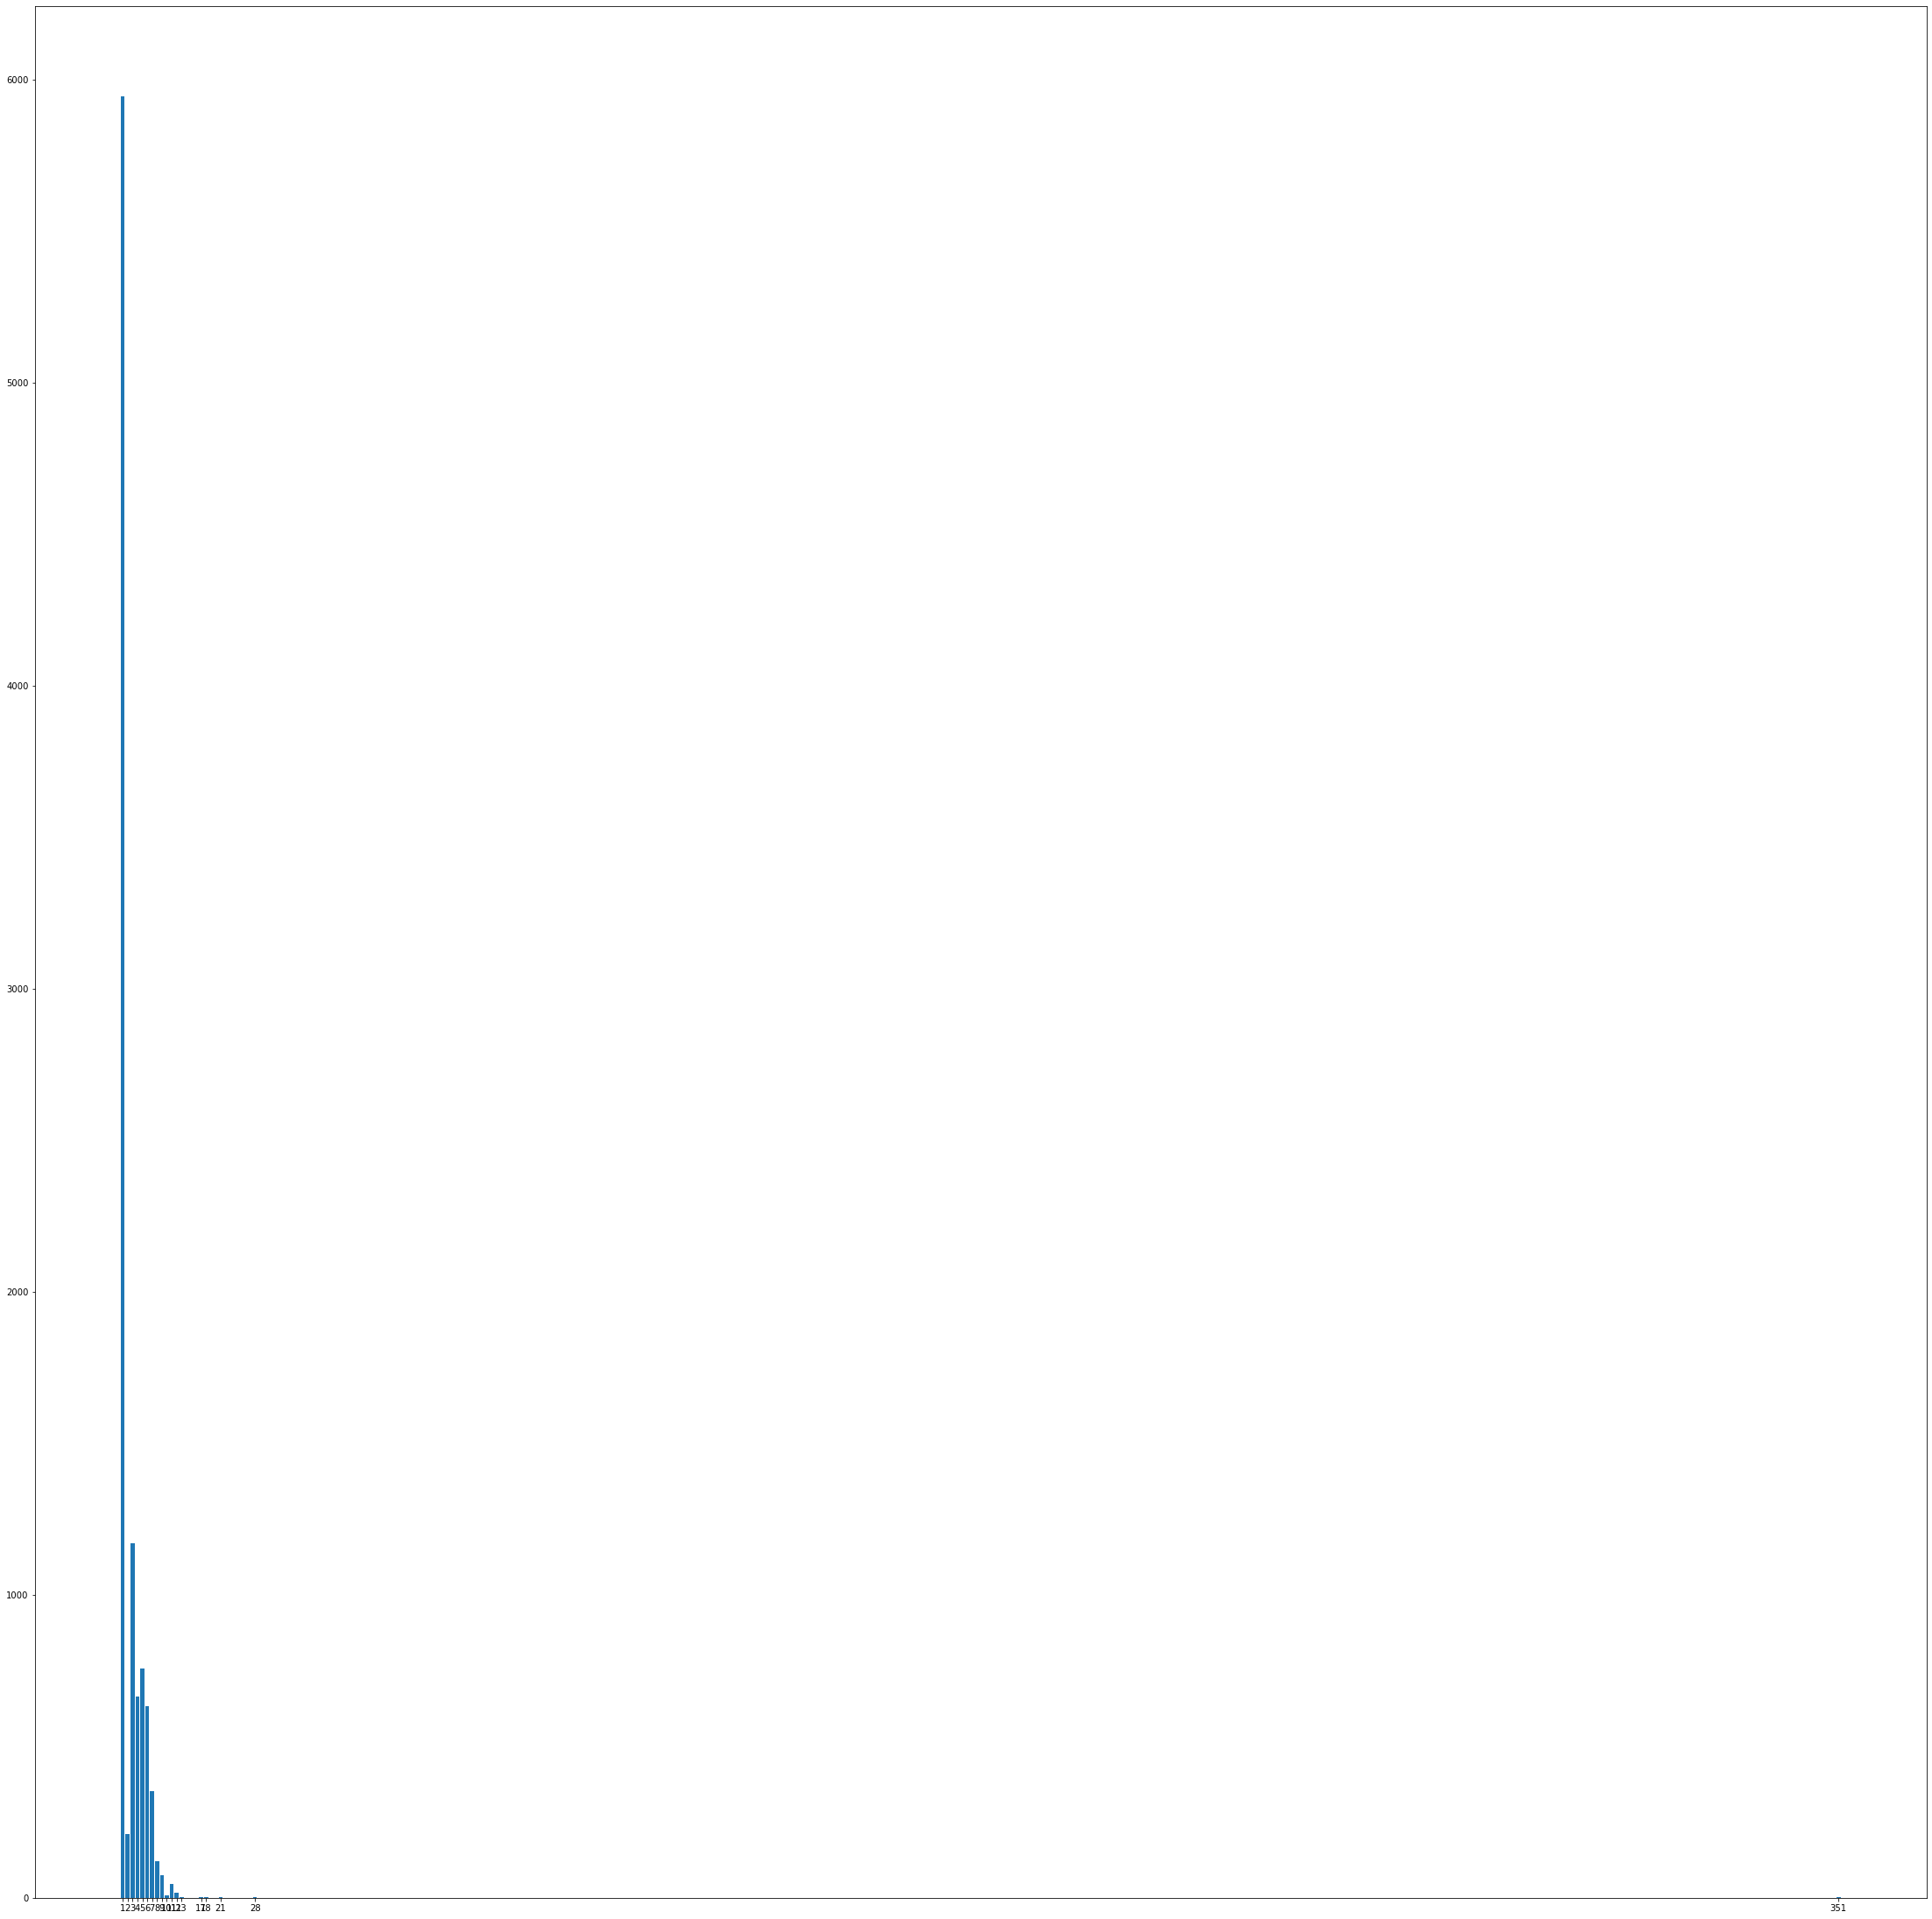

In [10]:
# Uncomment the code below and replace the ? with the correct values

fig = plt.figure(figsize=(30, 30))
ax = fig.add_axes([0,0,1,1])
x = chart_values[0]
y = chart_values[1]
ax.bar(x, y)
ax.set_xticks(x)
plt.show()

### Part 3

As you can see the previous chart is not nice to look at and the data is way too far apart. This is mainly being caused by 1 of the queries that had a 300+ word count. To fix this type of issue we're going to clean out some of the outlier data and make the useful data more presentable.

In [11]:
def prune_word_map(word_counts):
    keys_to_delete = []
    pruned_word_counts = word_counts
    for key in pruned_word_counts:
        if pruned_word_counts[key] < 5:
            keys_to_delete.append(key)
    for key in keys_to_delete:
        del pruned_word_counts[key]
    return pruned_word_counts

In [12]:
# Uncomment the lines below and replace the ? with the correct values
# hint for the pruned_word_map look at code cell #7

pruned_word_counts = prune_word_map(word_counts)
ordered_word_counts = sorted(pruned_word_counts.items())
chart_values = get_chart_values(ordered_word_counts)

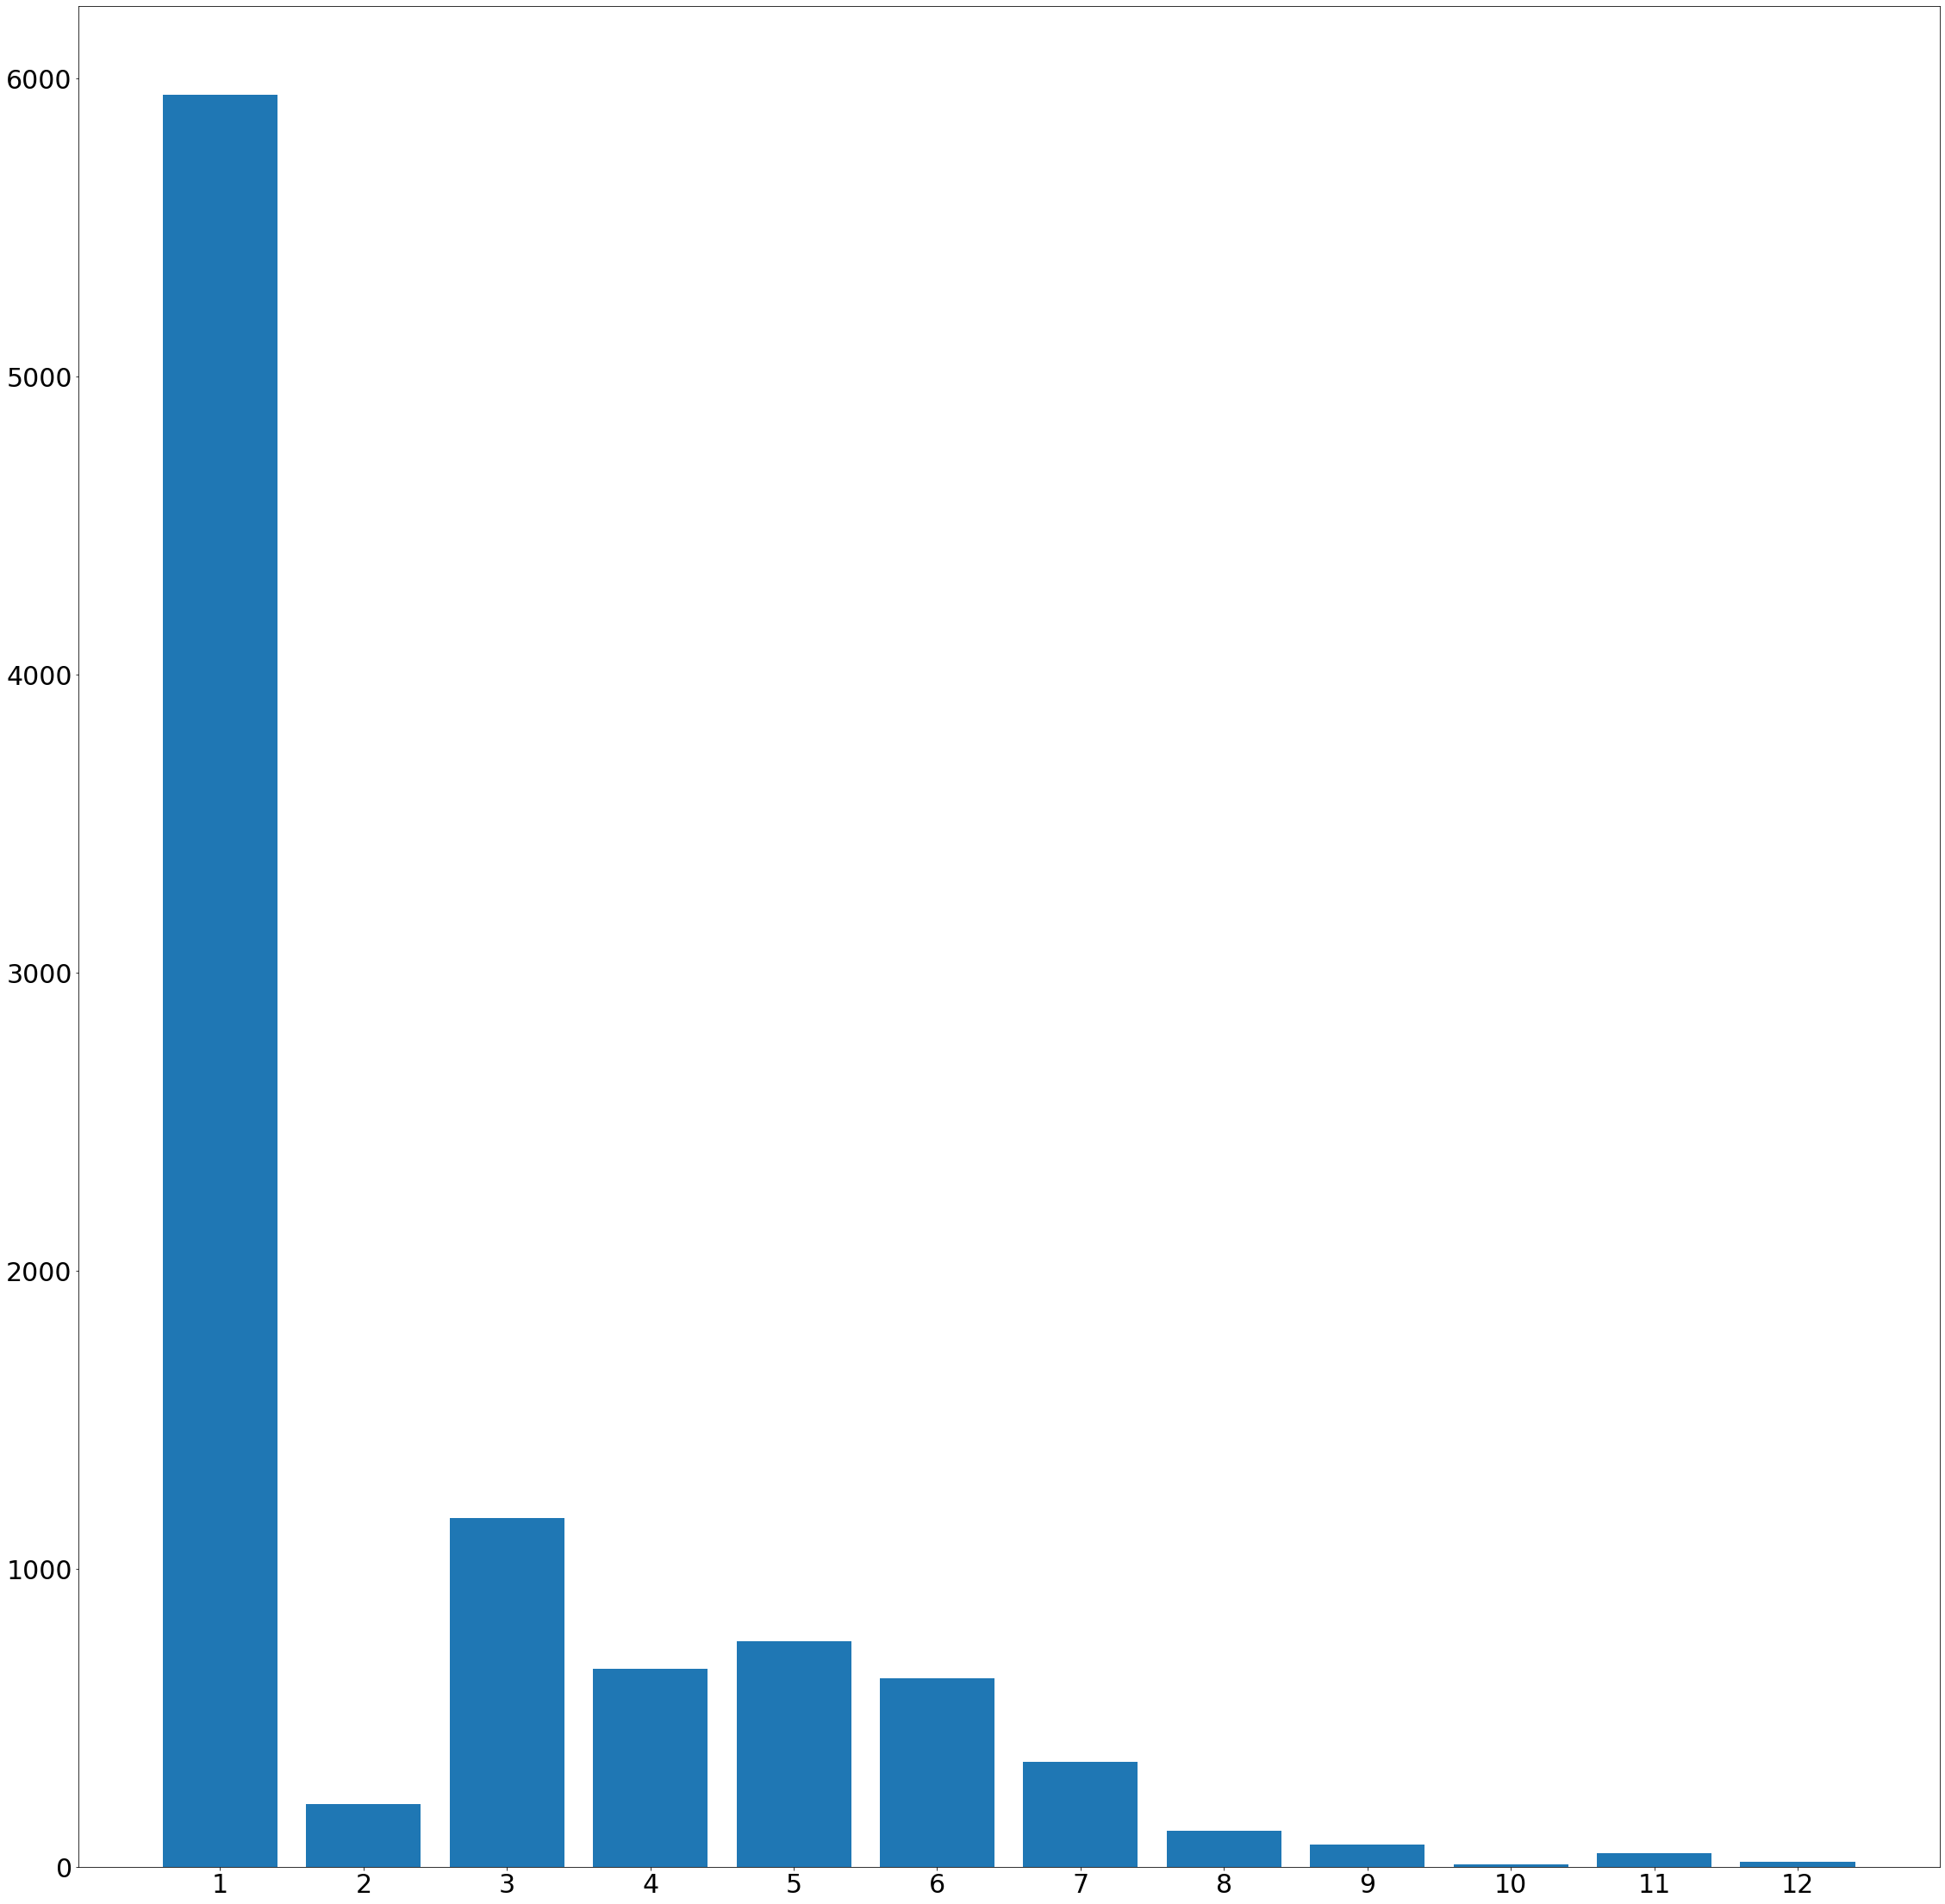

In [13]:
fig = plt.figure(figsize=(30, 30))
ax = fig.add_axes([0,0,1,1])
x = chart_values[0]
y = chart_values[1]
ax.bar(x, y)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
ax.set_xticks(x)
plt.show()

### Part 4 (Optional)

Can you tell what another outlier in the data might be? Prune the data again to remove the other outlier and normalize the data distrubtion on the bar chart even more.

In [14]:
# Uncomment the lines below and replace the ? with the correct values to reset chart_values with the outlier

normalized_word_counts = ordered_word_counts[1:-3]
chart_values = get_chart_values(normalized_word_counts)

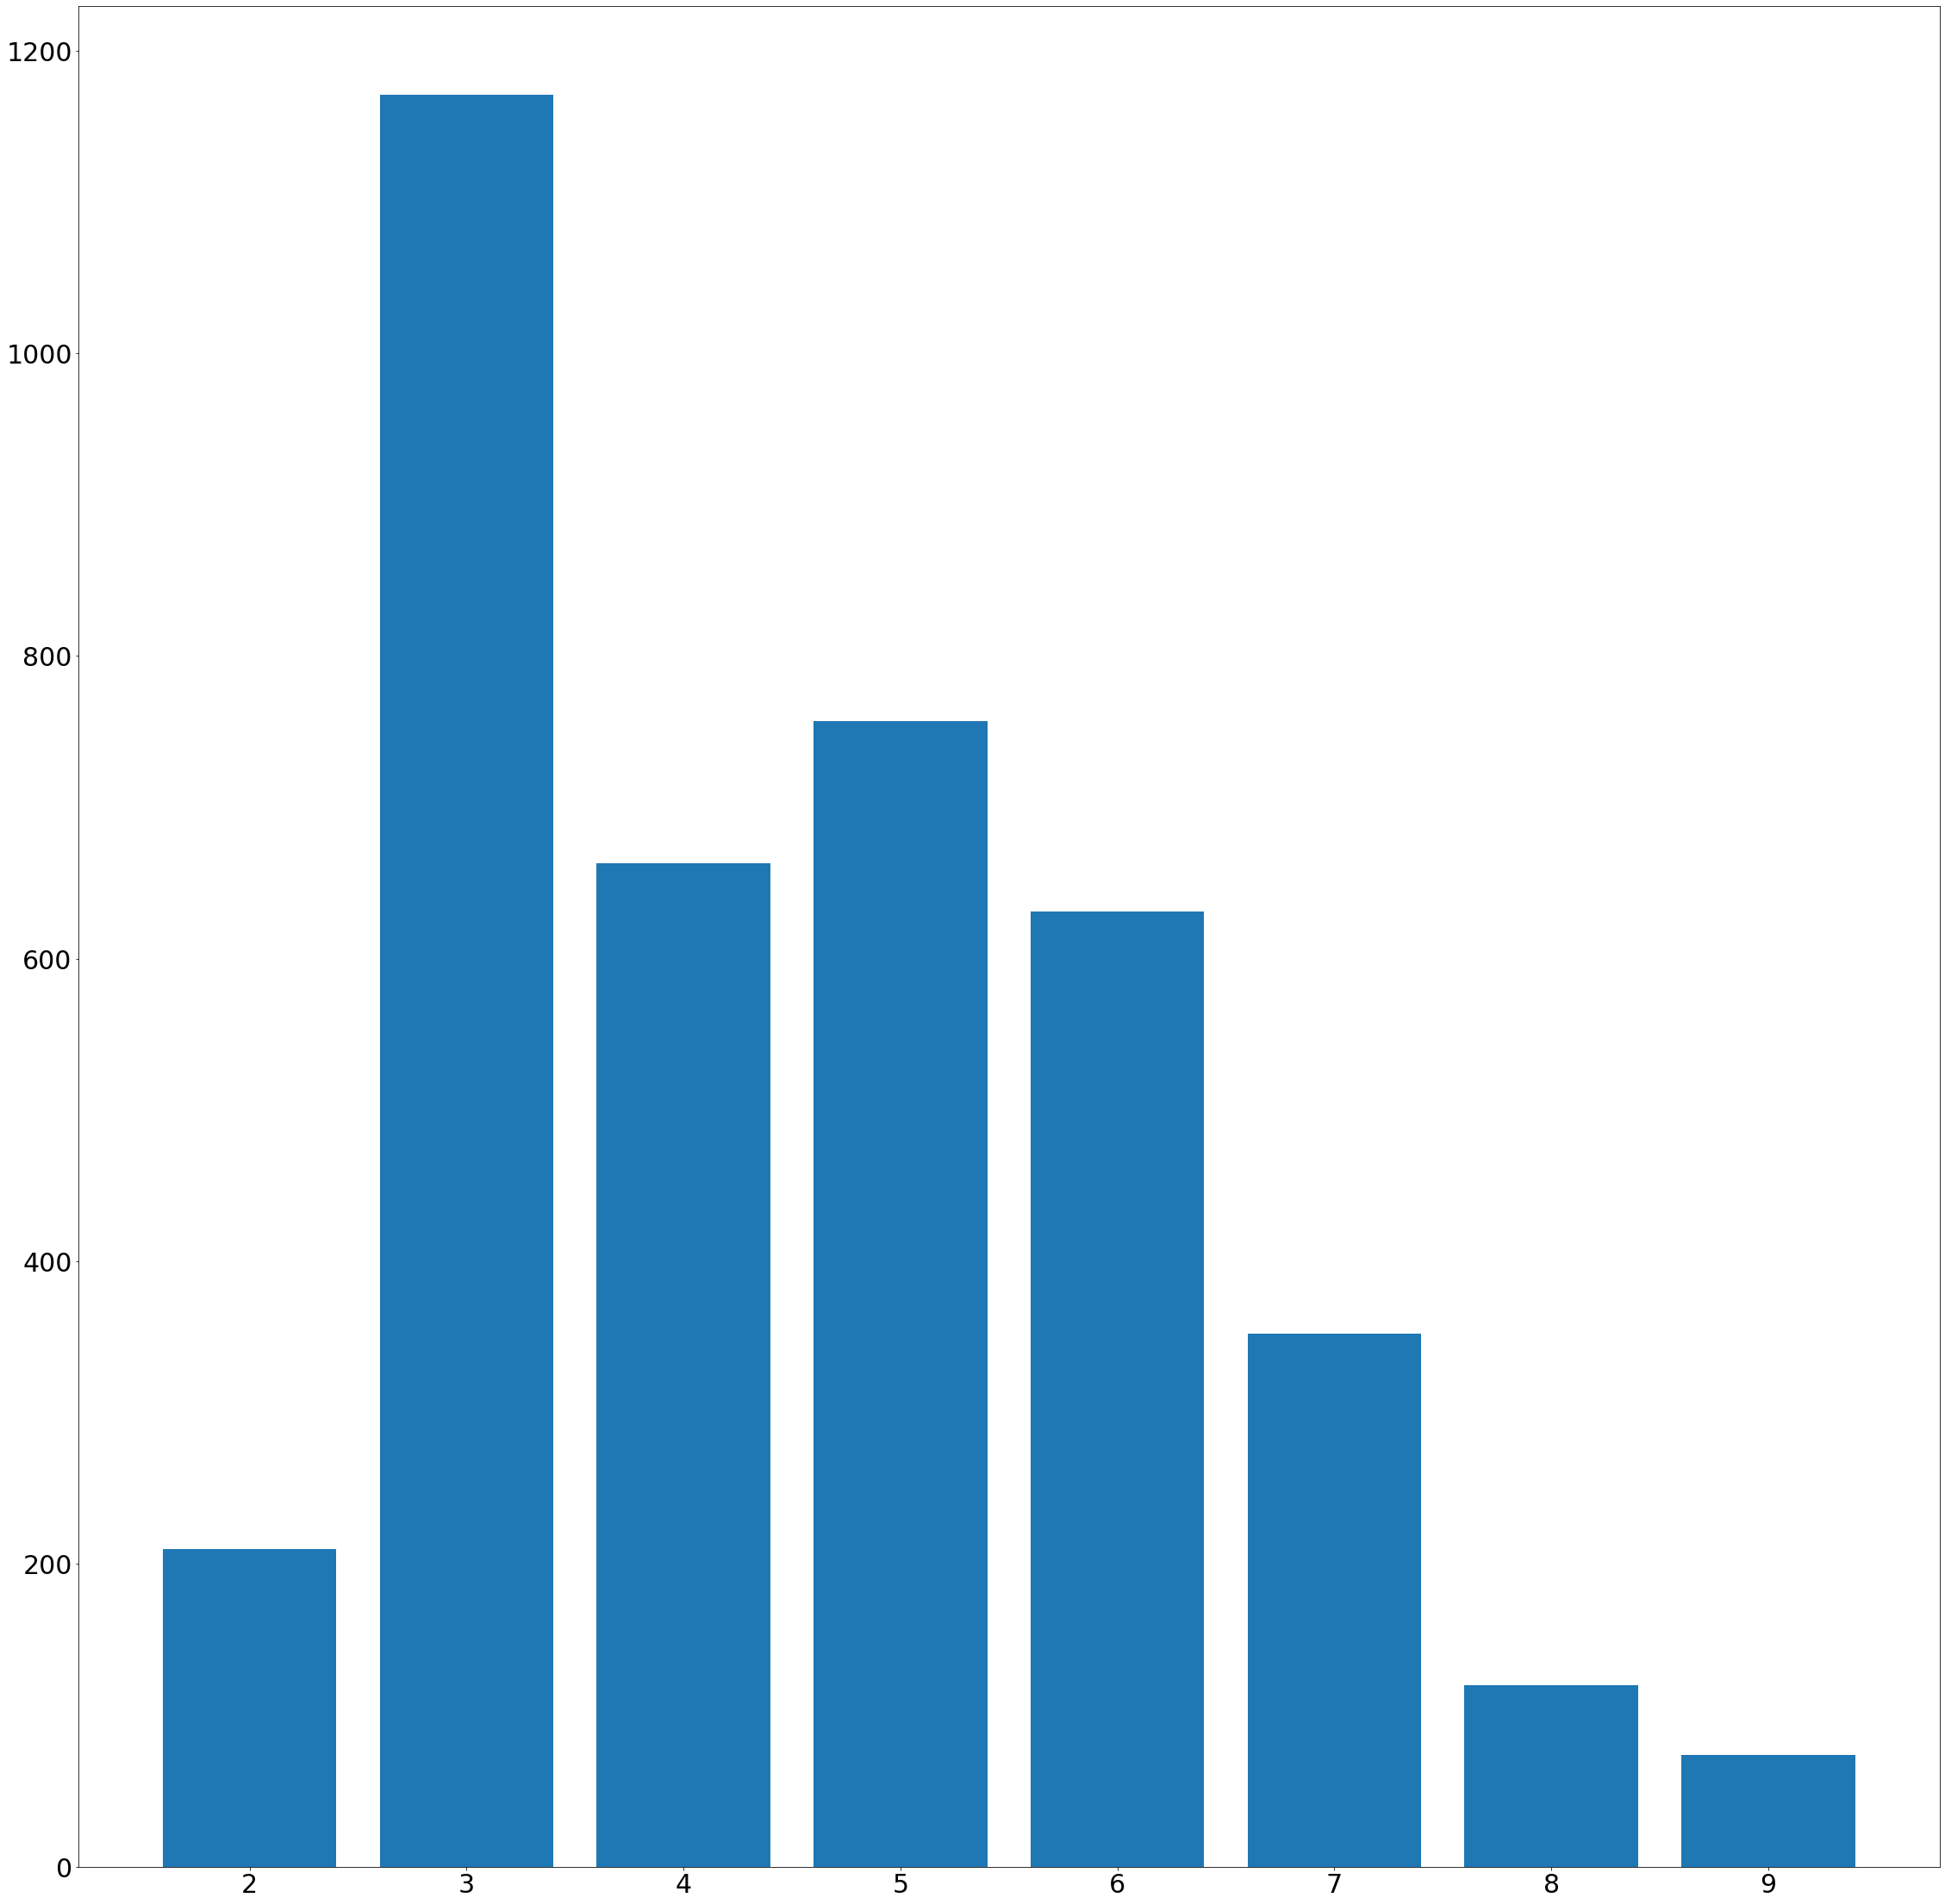

In [15]:
fig = plt.figure(figsize=(30, 30))
ax = fig.add_axes([0,0,1,1])
x = chart_values[0]
y = chart_values[1]
ax.bar(x, y)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
ax.set_xticks(x)
plt.show()